# Decision Tree
- A decision tree is a Supervised Machine Learning Algorithm that is basically a tree shape diagram that shows a graphical representation of a problem with all possible solutions.
- It can be used in both classification and regression problems but it is mostly used in classification problems.
- A classification tree learns a sequence of if else questions about individual features in order to infer labels.
- Can be sensitive to noisy data and outliers.
- Prone to overfitting, which can be mitigated with techniques like pruning.

## Approach
#### These steps outline the process to be followed when working on a predictive model: 
- Problem Definition
- Data Collection
- Data Preprocessing
- Feature Selection/Engineering
- Hyperparameter Tuning
- Data Splitting
- Model Selection
- Model Training
- Prediction
- Model Evaluation



## Problem Definition

### *Clearly state the problem you want to solve, as well as the outcome you want to predict.*


Here we have to predict the passengers would have saved in the Titanic using dataset consists of feature like Age, Sex, Survived, Fair, Ticket etc.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

## Data Collection

### *Gather relevant data that will be used to train and test the prediction model.*


In [2]:
df = pd.read_csv('titanic.csv')

In [9]:
df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Preprocessing


### *Clean the data by handling missing values, dealing with outliers, data visualization, normalizing features, and encoding categorical variables.*


In [17]:
df.count().isna()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [18]:
df.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

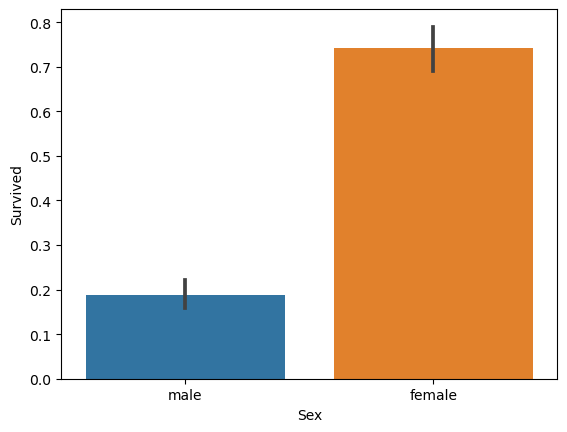

In [20]:
# Creating barplot for visulization

import seaborn as sns
sns.barplot(df['Sex'],df['Survived'],data=df);

## Feature Selection/Engineering

### *Identify which features are important for the prediction task and create new features if needed.*


In [21]:
ind_var = df.drop(['Ticket','Fare','Cabin','Embarked','Name','PassengerId','Survived','SibSp'], axis = 'columns')
ind_var

Pclass     Sex   Age  Parch
0         3    male  22.0      0
1         1  female  38.0      0
2         3  female  26.0      0
3         1  female  35.0      0
4         3    male  35.0      0
..      ...     ...   ...    ...
886       2    male  27.0      0
887       1  female  19.0      0
888       3  female   NaN      2
889       1    male  26.0      0
890       3    male  32.0      0

[891 rows x 4 columns]

In [37]:
df['Age'] = df['Age'].fillna(np.mean(df['Age']))

In [38]:
ind_var['Age'] = df['Age']
ind_var.head()

Pclass  Sex   Age  Parch
0       3    1  22.0      0
1       1    0  38.0      0
2       3    0  26.0      0
3       1    0  35.0      0
4       3    1  35.0      0

In [39]:
from sklearn.preprocessing import LabelEncoder
label_sex = LabelEncoder()
ind_var['Sex'] = label_sex.fit_transform(ind_var['Sex'])

In [40]:
ind_var.head()

Pclass  Sex   Age  Parch
0       3    1  22.0      0
1       1    0  38.0      0
2       3    0  26.0      0
3       1    0  35.0      0
4       3    1  35.0      0

In [41]:
tar_var = df['Survived']
tar_var.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Data Splitting

### *Divide the datasets into a training set and a testing set to evaluate your model's performance.*

In [42]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(ind_var, tar_var, test_size=0.2, random_state=45)

## Model Selection

### *Choose an appropriate machine learning algorithm based on the type of problem (classification, regression, etc.) and the characteristics of the data.*

In [59]:
from sklearn import tree

In [60]:
model = tree.DecisionTreeClassifier()

## Model Training

### *Use the training data to train the selected model by adjusting its parameters to minimize the prediction error.*

In [61]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediction

### *Once the model is trained and validated, it can be used to make predictions on new, unseen data.*


In [62]:
model.predict(X_test)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [63]:
model.predict([[3, 1, 22, 0]])

array([0], dtype=int64)

## Hyperparameter Tuning
### *Fine-tune the model's hyperparameters to optimize its performance.*

No need !!!

## Model Evaluation

### *Assess the model's performance on a separate set of data not used during training to understand its predictive power and generalization capability.*



In [65]:
model.score(X_test, y_test)

0.8770949720670391

## Thank You !!!